# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Directory

In [2]:
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train'
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test'

## Set Images

In [3]:
img_height = 128
img_width = 128
batch_size = 32

## Train Dataset

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    color_mode = 'grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    color_mode = 'grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    color_mode = 'grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [5]:
train_ds.class_names

['NORMAL', 'PNEUMONIA']

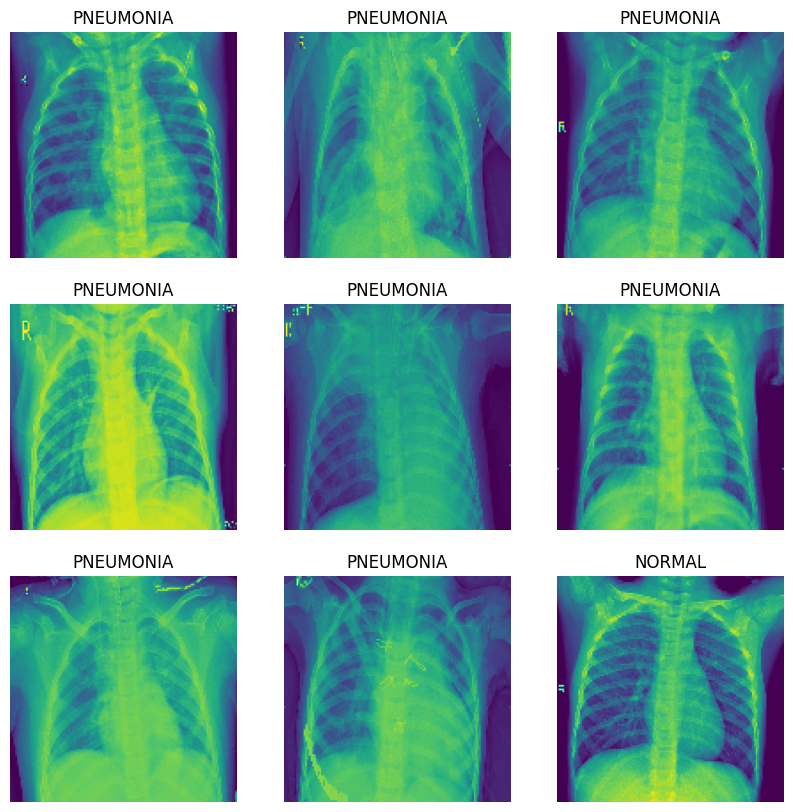

In [6]:
plt.figure(figsize=(10, 10))
# use images and labels tensors to iterate through one batch of 32 images and
# labels from the trained dataset
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis('off')

## Cache and Prefetch Data to Prevent Same Image Being Read

In [7]:
# a value that will dynamically run at runtime
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Build Model

In [8]:
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1/255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.experimental.preprocessing.Rescaling(1/255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.experimental.preprocessing.Rescaling(1/255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

## Compile Model

In [9]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

## Set Epochs

In [10]:
epochs = 10

## Fit the Model

In [11]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


163/163 [==============================] - 74s 442ms/step - loss: 0.5787 - accuracy: 0.7425 - val_loss: 0.8583 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 59s 364ms/step - loss: 0.5728 - accuracy: 0.7429 - val_loss: 0.8561 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 59s 364ms/step - loss: 0.5726 - accuracy: 0.7429 - val_loss: 0.8512 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 59s 361ms/step - loss: 0.5724 - accuracy: 0.7429 - val_loss: 0.8462 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 59s 362ms/step - loss: 0.5721 - accuracy: 0.7429 - val_loss: 0.8413 - val_accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 59s 364ms/step - loss: 0.5719 - accuracy: 0.7429 - val_loss: 0.8371 - val_accuracy: 0.5000
Epoch 7/10
163/163 [==============================] - 60s 369ms/step - loss: 0.5718 - accuracy: 0.7429 - val_loss: 0.8329 - val_accuracy: 0.5

## Evaluate Model

In [12]:
 model.evaluate(test_ds)

20/20 [==============================] - 3s 125ms/step - loss: 0.6946 - accuracy: 0.6250


[0.6946287155151367, 0.625]